# Duas variáveis

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
dict_sex = {'male':0, 'female':1}
train['Sex_binary'] = train['Sex'].map(dict_sex)
test['Sex_binary'] = test['Sex'].map(dict_sex)

In [6]:
variables = ['Sex_binary', 'Age']

X = train[variables]
y = train['Survived']

X_test = test[variables]

# valores nulos
# -1 invalida a linha
X = X.fillna(-1)
X_test = X_test.fillna(-1)


In [11]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

cv_results = cross_validate(model, X, y, cv=10, scoring='accuracy')
cv_results

{'fit_time': array([0.04883504, 0.03313494, 0.03283715, 0.03088164, 0.03385425,
        0.0316143 , 0.03309393, 0.03287506, 0.03104496, 0.032552  ]),
 'score_time': array([0.00708818, 0.00723696, 0.00662208, 0.00672317, 0.00764918,
        0.00658488, 0.00651217, 0.00712705, 0.00671911, 0.00698304]),
 'test_score': array([0.75555556, 0.82022472, 0.73033708, 0.85393258, 0.80898876,
        0.74157303, 0.75280899, 0.74157303, 0.7752809 , 0.75280899])}

(array([3., 2., 1., 1., 0., 0., 1., 1., 0., 1.]),
 array([0.73033708, 0.74269663, 0.75505618, 0.76741573, 0.77977528,
        0.79213483, 0.80449438, 0.81685393, 0.82921348, 0.84157303,
        0.85393258]),
 <BarContainer object of 10 artists>)

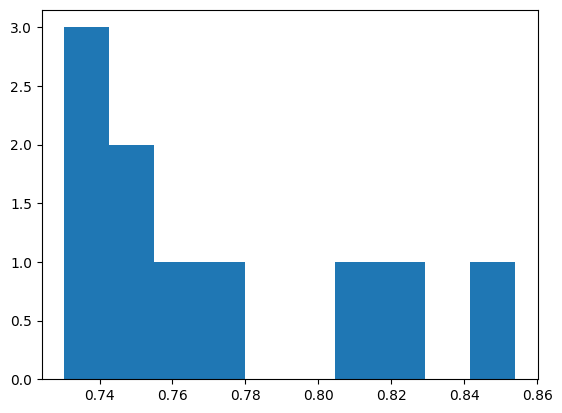

In [13]:
import matplotlib.pyplot as plt

plt.hist(cv_results['test_score'])

In [14]:
bench_score = cv_results['test_score'].mean()
bench_score

0.7733083645443196

# Novas variáveis

In [15]:
# only numerical for now
variables = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variables]
y = train['Survived']

X_test = test[variables]

# valores nulos
# -1 invalida a linha
X = X.fillna(-1)
X_test = X_test.fillna(-1)

In [16]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

cv_results = cross_validate(model, X, y, cv=10, scoring='accuracy')

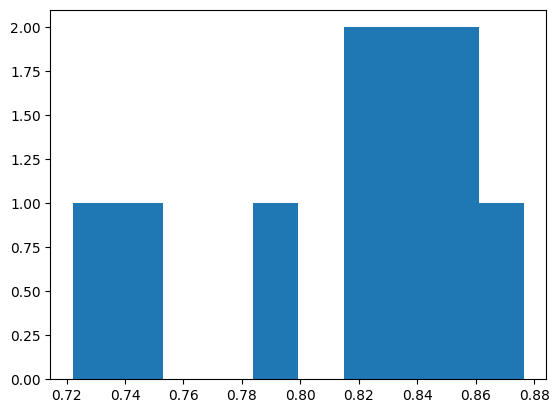

In [18]:
plt.hist(cv_results['test_score']);

In [19]:
new_score = cv_results['test_score'].mean()
new_score

0.8160424469413232

In [20]:
# retrain the model

model.fit(X, y)

pred = model.predict(X_test)
sub = pd.Series(pred, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [22]:
sub.to_csv('fourth_model.csv', header=True)

In [23]:
!head -n10 fourth_model.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
